In [1]:
%set_env DYLD_LIBRARY_PATH=/Users/hosborn/python/MultiNest/lib

env: DYLD_LIBRARY_PATH=/Users/hosborn/python/MultiNest/lib


In [5]:
import json
import numpy as np
from numpy import log, exp, pi
import scipy.stats, scipy
import pymultinest
import matplotlib.pyplot as plt

In [ ]:
import json
import numpy
from numpy import log, exp, pi
import scipy.stats, scipy
import pymultinest
import matplotlib.pyplot as plt

# we define the problem: we need a prior function which maps from [0:1] to the parameter space

# we only have one parameter, the position of the gaussian (ndim == 1)
# map it from the unity interval 0:1 to our problem space 0:2 under a uniform prior
def prior(cube, ndim, nparams):
    cube[0] = cube[0] * 2

# our likelihood function consists of 6 gaussians modes (solutions) at the positions
positions = numpy.array([0.1, 0.2, 0.5, 0.55, 0.9, 1.1])
width = 0.01

def loglike(cube, ndim, nparams):
    # get the current parameter (is between 0:2 now)
    pos = cube[0]
    likelihood = exp(-0.5 * ((pos - positions) / width)**2) / (2*pi*width**2)**0.5
    return log(likelihood.mean())

# number of dimensions our problem has
parameters = ["position"]
n_params = len(parameters)

# run MultiNest
pymultinest.run(loglike, prior, n_params, verbose = True)

In [6]:
per_gaps=np.array([[30,3000,2700]])

In [13]:
per_index = -8/3
#Need to loop through possible period gaps, according to their prior probability *density* (hence the final term diiding by gap width)
rel_gap_prob = (per_gaps[:,0]**(per_index)-per_gaps[:,1]**(per_index))/per_gaps[:,2]
rel_gap_prob /= np.sum(rel_gap_prob)
rel_gap_prob = np.hstack((0.0,np.cumsum(rel_gap_prob)))
incube=np.random.random(1000000)
outcube=incube[:]
#looping through each gpa, cutting the "cube" up according to their prior probability and making a p~P^-8/3 distribution for each gap:
for i in range(len(rel_gap_prob)-1):
    ind_min=np.power(per_gaps[i,1]/per_gaps[i,0],per_index)
    outcube[(incube>rel_gap_prob[i])&(incube<=rel_gap_prob[i+1])]=np.power(((1-ind_min)*(incube[(incube>rel_gap_prob[i])&(incube<=rel_gap_prob[i+1])]-rel_gap_prob[i])/(rel_gap_prob[i+1]-rel_gap_prob[i])+ind_min),1/per_index)*per_gaps[i,0]

In [21]:
P=outcube
from scipy.stats import beta
ecc=beta.ppf(np.random.random(1000000),a=0.867, b=3.03)
omega=np.random.random(1000000)*np.pi*2

(array([1.90000e+01, 8.10000e+01, 1.95000e+02, 4.39000e+02, 8.53000e+02,
        1.52500e+03, 2.29800e+03, 3.30400e+03, 4.66200e+03, 6.39200e+03,
        8.64000e+03, 1.13020e+04, 1.48230e+04, 1.96440e+04, 2.54260e+04,
        3.29130e+04, 4.33860e+04, 5.92210e+04, 8.54820e+04, 1.64895e+05,
        1.86610e+05, 8.77290e+04, 6.06520e+04, 4.42360e+04, 3.35490e+04,
        2.58620e+04, 2.00500e+04, 1.51760e+04, 1.15810e+04, 8.80600e+03,
        6.54400e+03, 4.74900e+03, 3.27900e+03, 2.43800e+03, 1.48300e+03,
        8.75000e+02, 5.28000e+02, 2.47000e+02, 8.40000e+01, 2.20000e+01]),
 array([0.00337622, 0.01115347, 0.01893071, 0.02670796, 0.03448521,
        0.04226245, 0.0500397 , 0.05781695, 0.0655942 , 0.07337144,
        0.08114869, 0.08892594, 0.09670318, 0.10448043, 0.11225768,
        0.12003493, 0.12781217, 0.13558942, 0.14336667, 0.15114391,
        0.15892116, 0.16669841, 0.17447566, 0.1822529 , 0.19003015,
        0.1978074 , 0.20558464, 0.21336189, 0.22113914, 0.22891639,
      

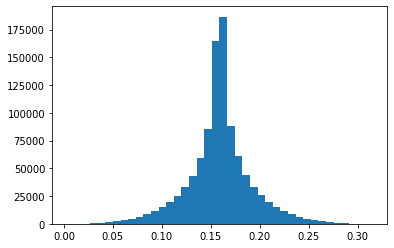

In [34]:
plt.hist((1+ecc*np.sin(omega))/(np.pi*2),bins=40)

In [38]:
omega[np.argmax((1+ecc*np.sin(omega))/(np.pi*2))]

1.6187798067920665

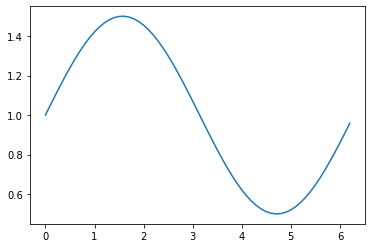

In [40]:
plt.plot(np.arange(0,np.pi*2,0.1),1+0.5*np.sin(np.arange(0,np.pi*2,0.1)))

In [55]:
from scipy.stats import arcsine
from scipy.stats import cosine

(array([27., 31., 35., 38., 41., 44., 46., 48., 49., 50., 50., 49., 48.,
        46., 44., 41., 38., 35., 31., 26., 24., 19., 15., 12.,  9.,  6.,
         4.,  2.,  0.,  0.,  2.,  0.,  2.,  4.,  6.,  8., 12., 16., 19.,
        23.]),
 array([1.54468534e-03, 1.58466828e-01, 3.15388971e-01, 4.72311114e-01,
        6.29233257e-01, 7.86155400e-01, 9.43077543e-01, 1.09999969e+00,
        1.25692183e+00, 1.41384397e+00, 1.57076612e+00, 1.72768826e+00,
        1.88461040e+00, 2.04153254e+00, 2.19845469e+00, 2.35537683e+00,
        2.51229897e+00, 2.66922112e+00, 2.82614326e+00, 2.98306540e+00,
        3.13998755e+00, 3.29690969e+00, 3.45383183e+00, 3.61075397e+00,
        3.76767612e+00, 3.92459826e+00, 4.08152040e+00, 4.23844255e+00,
        4.39536469e+00, 4.55228683e+00, 4.70920898e+00, 4.86613112e+00,
        5.02305326e+00, 5.17997541e+00, 5.33689755e+00, 5.49381969e+00,
        5.65074183e+00, 5.80766398e+00, 5.96458612e+00, 6.12150826e+00,
        6.27843041e+00]),
 <a list of 40 Patch

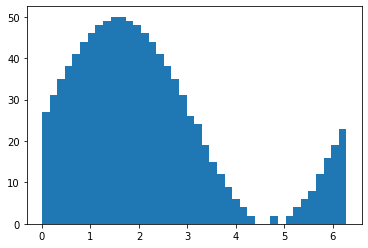

In [81]:
plt.hist((cosine.ppf(np.linspace(0,1,1000))+np.pi*0.5)%(np.pi*2),40)

In [93]:
eccs=transform_beta(np.random.random(400000),a=0.867, b=3.03)
omegas=transform_omega(eccs,np.random.random(400000))

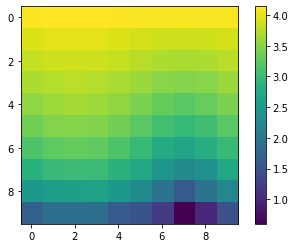

In [97]:
hists=np.histogram2d(eccs,omegas)
plt.imshow(np.log10(hists[0]));plt.colorbar()

In [ ]:
x = numpy.linspace(0, 1, 400)
ydata = None # loaded below

noise = 0.1

np.loadtxt("/Users/hosborn/python/PyMultiNest/pymultinest/")

# model for 2 gaussians, same width, fixed offset
def model(pos1, width, height1, height2):
    pos2 = pos1 + 0.05
    return  height1 * scipy.stats.norm.pdf(x, pos1, width) + \
        height2 * scipy.stats.norm.pdf(x, pos2, width)

# a more elaborate prior
# parameters are pos1, width, height1, [height2]
def prior(cube, ndim, nparams):
    #cube[0] = cube[0]            # uniform prior between 0:1
    cube[1] = 10**(cube[1]*8 - 4) # log-uniform prior between 10^-4 and 10^4
    cube[2] = 10**(cube[2]*4 - 4) # log-uniform prior between 10^-4 and 1
    if ndim < 4:
        return
    cube[3] = 10**(cube[3]*4 - 4) # log-uniform prior between 10^-4 and 1


def loglike(cube, ndim, nparams):
    pos1, width, height1 = cube[0], cube[1], cube[2]
    height2 = cube[3] if ndim > 3 else 0
    ymodel = model(pos1, width, height1, height2)
    loglikelihood = (-0.5 * ((ymodel - ydata) / noise)**2).sum()
    return loglikelihood

parameters = ["pos1", "width", "height1"]
n_params = len(parameters)

pymultinest.run(loglike, prior, n_params, outputfiles_basename='test_1_', resume = False, verbose = True)


In [84]:
from scipy.stats import norm,beta,truncnorm

def transform_uniform(x,a,b):
    return a + (b-a)*x

def transform_loguniform(x,a,b):
    la=np.log(a)
    lb=np.log(b)
    return np.exp(la + x*(lb-la))

def transform_normal(x,mu,sigma):
    return norm.ppf(x,loc=mu,scale=sigma)

def transform_beta(x,a,b):
    return beta.ppf(x,a,b)

def transform_truncated_normal(x,mu,sigma,a=0.,b=1.):
    ar, br = (a - mu) / sigma, (b - mu) / sigma
    return truncnorm.ppf(x,ar,br,loc=mu,scale=sigma)

def transform_omega(e_cube,omega_cube):
    split=np.random.random(len(e_cube))<(1-e_cube)
    #2-pi region
    omega_cube[split]=omega_cube[split]*np.pi*2
    #Sinusoidal region using a shifted cosine:
    omega_cube[~split]=(cosine.ppf(omega_cube[~split])+np.pi*0.5)%(np.pi*2)
    return omega_cube

In [105]:
def multinest():
    parameters = ["x", "y"]
    n_params = len(parameters)
    args=(x_data, y_data, err_data)
    
    def run_multinest():
        per_index=-8/3

        def myprior(cube, ndim, nparams):
            # do prior transformation
            start=None

            ######################################
            #   Intialising Stellar Params:
            ######################################
            #Using log rho because otherwise the distribution is not normal:
            cube_indeces={}
            cube_indeces['logrho_S']=nparams;nparams+=1
            cube[0] = transform_normal(cube[0],mu=np.log(self.rhostar[0]), 
                                        sd=np.average(abs(self.rhostar[1:]/self.rhostar[0])))
            cube_indeces['Rs']=nparams;nparams+=1
            cube[cube_indeces['Rs']] = transform_normal(cube[cube_indeces['Rs']],mu=self.Rstar[0],
                                                        sd=np.average(abs(self.Rstar[1:])))
            # The baseline flux
            cube_indeces['mean']=nparams;nparams+=1
            cube_indeces['mean']=transform_normal(cube[cube_indeces['mean']],mu=np.median(self.lc['flux'][self.lc['mask']]),
                                                  sd=np.std(self.lc['flux'][self.lc['mask']]))

            # The 2nd light (not third light as companion light is not modelled) 
            # This quantity is in delta-mag
            if useL2:
                cube_indeces['deltamag_contam']=nparams;nparams+=1
                cube[cube_indeces['deltamag_contam']] = transform_uniform(cube[cube_indeces['deltamag_contam']], lower=-20.0, upper=20.0)
                mult = (1+np.power(2.511,-1*cube[cube_indeces['deltamag_contam']])) #Factor to multiply normalised lightcurve by
            else:
                mult=1.0

            print("Forming Pymc3 model with: monos:",self.monos,"multis:",self.multis,"duos:",self.duos)

            ######################################
            #     Initialising Periods & tcens
            ######################################
            for pl in self.multis+self.monos+self.duos:
                tcen=self.planets[pl]['tcen']
                tdur=self.planets[pl]['tdur']
                cube_indeces['t0_'+pl]=nparams;nparams+=1
                cube[cube_indeces['t0_'+pl]]=transform_truncated_normal(cube[cube_indeces['t0_'+pl]],
                                                                        mu=tcen,sigma=tdur*0.1,
                                                                        a=tcen-tdur*0.5,b=tcen+tdur*0.5)
                if pl in self.monos:
                    cube_indeces['per_'+pl]=nparams;nparams+=1
                    per_index = -8/3
                    #Need to loop through possible period gaps, according to their prior probability *density* (hence the final term diiding by gap width)
                    rel_gap_prob = (self.planets[pl]['per_gaps'][:,0]**(per_index)-self.planets[pl]['per_gaps'][:,1]**(per_index))/self.planets[pl]['per_gaps'][:,2]
                    rel_gap_prob /= np.sum(rel_gap_prob)
                    rel_gap_prob = np.hstack((0.0,np.cumsum(rel_gap_prob)))
                    incube=cube[cube_indeces['per_'+pl]]
                    outcube=incube[:]
                    #looping through each gpa, cutting the "cube" up according to their prior probability and making a p~P^-8/3 distribution for each gap:
                    for i in range(len(rel_gap_prob)-1):
                        ind_min=np.power(self.planets[pl]['per_gaps'][i,1]/self.planets[pl]['per_gaps'][i,0],per_index)
                        outcube[(incube>relgap_prob[i])&(incube<=rel_gap_prob[i+1])]=np.power(((1-ind_min)*(incube[(incube>rel_gap_prob[i])&(incube<=rel_gap_prob[i+1])]-rel_gap_prob[i])/(rel_gap_prob[i+1]-rel_gap_prob[i])+ind_min),1/per_index)*self.planets[pl]['per_gaps'][i,0]
                    cube[cube_indeces['per_'+pl]]=outcube
                # The period distributions of monotransits are tricky as we often have gaps to contend with
                # We cannot sample the full period distribution while some regions have p=0.
                # Therefore, we need to find each possible period region and marginalise over each

                if pl in self.duos:
                    #In the case of a duotransit, we have a discrete series of possible periods between two know transits.
                    #If we want to model this duo transit exactly like the first (as a bounded normal)
                    # we can work out the necessary periods to cause these dips
                    cube_indeces['t0_2_'+pl]=nparams;nparams+=1
                    tcen2=self.planets[pls]['tcen_2']
                    cube[cube_indeces['t0_2_'+pl]]=transform_truncated_normal(cube[cube_indeces['t0_2_'+pl]],
                                                                            mu=tcen2,sigma=tdur*0.1,
                                                                            a=tcen2-tdur*0.5,b=tcen2+tdur*0.5)
                    cube_indeces['duo_per_int_'+pl]=nparams;nparams+=1
                    rel_per_prob = duo['period_aliases']**(-8/3)
                    rel_per_prob /= np.sum(rel_per_prob)
                    rel_per_prob = np.hstack((0.0,np.cumsum(rel_per_prob)))
                    rel_per_prob[-1]=1.0
                    incube=cube[cube_indeces['duo_per_int_'+pl]]
                    outcube=incube[:]
                    #looping through each gp,p cutting the "cube" up according to their prior probability and making a p~P^-8/3 distribution for each gap:
                    for i in range(len(rel_per_prob)-1):
                        ind_min=np.power(self.planets[pl]['per_gaps'][i,1]/self.planets[pl]['per_gaps'][i,0],per_index)
                        outcube[(incube>rel_per_prob[i])&(incube<=rel_per_prob[i+1])]=duo['period_int_aliases'][i]
                    cube[cube_indeces['duo_per_int_'+pl]]=outcube
                if pl in self.multis:
                    cube_indeces['per_'+pl]=nparams;nparams+=1
                    p=self.planets[pls]['period']
                    perr=self.planets[pls]['period_err']
                    cube[cube_indeces['per_'+pl]]=transform_normal(cube[cube_indeces['per_'+pl]],
                                                                            mu=p,
                                                                            sigma=np.clip(perr*0.25,0.005,0.02*p))
                    #In the case of multitransiting plaets, we know the periods already, so we set a tight normal distribution

                ######################################
                #     Initialising R_p & b
                ######################################
                # The Espinoza (2018) parameterization for the joint radius ratio and
                # impact parameter distribution
                rpl=self.planets[pl]['r_pl']/(109.1*self.Rstar[0])
                maxr=1.0 if useL2 else 0.2
                cube_indeces['r_pl_'+pl]=nparams;nparams+=1
                cube[cube_indeces['r_pl_'+pl]] = transform_uniform(cube[cube_indeces['r_pl_'+pl]],0.0,maxr)

                cube_indeces['b_'+pl]=nparams;nparams+=1
                cube[cube_indeces['b_'+pl]] = transform_uniform(cube[cube_indeces['b_'+pl]],0.0,1.0)
                #We can do the adjustment for b later when sampling in the model

                if not assume_circ:
                    cube_indeces['ecc_'+pl]=nparams;nparams+=1
                    cube[cube_indeces['ecc_'+pl]] = transform_beta(cube[cube_indeces['ecc_'+pl]],a=0.867, b=3.03)

                    #Here we have a joint disribution of omega and eccentricity
                    # This isn't perfect but it better includes the fact that high-ecc planets are more likely to transit close to periasteron
                    cube_indeces['omega_'+pl]=nparams;nparams+=1
                    cube[cube_indeces['omega_'+pl]] = transform_omega(cube[cube_indeces['ecc_'+pl]],cube[cube_indeces['omega_'+pl]])


            ######################################
            #     Initialising Limb Darkening
            ######################################
            # Here we either constrain the LD params given the stellar info, OR we let exoplanet fit them
            if len(np.unique([c[0] for c in self.cads]))==1:
                if constrain_LD:
                    n_samples=1200
                    # Bounded normal distributions (bounded between 0.0 and 1.0) to constrict shape given star.

                    #Single mission
                    if 't' in np.unique([c[0].lower() for c in self.cads]):
                        ld_dists=self.getLDs(n_samples=3000,mission='tess')
                        cube_indeces['u_star_tess_0']=nparams;nparams+=1
                        cube[cube_indeces['u_star_tess_0']] = transform_truncated_normal(cube[cube_indeces['u_star_tess_0']],
                                                                                        mu=np.clip(np.nanmedian(ld_dists[:,0],axis=0),0,1),
                                                                                        sd=np.clip(ld_mult*np.nanstd(ld_dists[:,0],axis=0),0.05,1.0),
                                                                                        a=0.0,b=1.0)
                        cube_indeces['u_star_tess_1']=nparams;nparams+=1
                        cube[cube_indeces['u_star_tess_1']] = transform_truncated_normal(cube[cube_indeces['u_star_tess_1']],
                                                                                        mu=np.clip(np.nanmedian(ld_dists[:,0],axis=0),0,1),
                                                                                        sd=np.clip(ld_mult*np.nanstd(ld_dists[:,0],axis=0),0.05,1.0),
                                                                                        a=0.0,b=1.0)
                    if 'k' in np.unique([c[0].lower() for c in self.cads]):
                        ld_dists=self.getLDs(n_samples=3000,mission='kepler')
                        cube_indeces['u_star_kep_0']=nparams;nparams+=1
                        cube[cube_indeces['u_star_kep_0']] = transform_truncated_normal(cube[cube_indeces['u_star_kep_0']],
                                                                                        mu=np.clip(np.nanmedian(ld_dists[:,0],axis=0),0,1),
                                                                                        sd=np.clip(ld_mult*np.nanstd(ld_dists[:,0],axis=0),0.05,1.0),
                                                                                        a=0.0,b=1.0)
                        cube_indeces['u_star_kep_1']=nparams;nparams+=1
                        cube[cube_indeces['u_star_kep_1']] = transform_truncated_normal(cube[cube_indeces['u_star_kep_1']],
                                                                                        mu=np.clip(np.nanmedian(ld_dists[:,0],axis=0),0,1),
                                                                                        sd=np.clip(ld_mult*np.nanstd(ld_dists[:,0],axis=0),0.05,1.0),
                                                                                        a=0.0,b=1.0)
                else:
                    if 't' in np.unique([c[0].lower() for c in self.cads]):
                        cube_indeces['u_star_tess_0']=nparams;nparams+=1
                        cube[cube_indeces['u_star_tess_0']] = transform_uniform(cube[cube_indeces['u_star_tess_0']],0.0,1.0)
                        cube_indeces['u_star_tess_1']=nparams;nparams+=1
                        cube[cube_indeces['u_star_tess_1']] = transform_uniform(cube[cube_indeces['u_star_tess_1']],0.0,1.0)
                    if 'k' in np.unique([c[0].lower() for c in self.cads]):
                        cube_indeces['u_star_kep_0']=nparams;nparams+=1
                        cube[cube_indeces['u_star_kep_0']] = transform_uniform(cube[cube_indeces['u_star_kep_0']],0.0,1.0)
                        cube_indeces['u_star_kep_1']=nparams;nparams+=1
                        cube[cube_indeces['u_star_kep_1']] = transform_uniform(cube[cube_indeces['u_star_kep_1']],0.0,1.0)

            ######################################
            #     Initialising GP kernel
            ######################################
            log_flux_std=np.array([np.log(np.std(self.lc['flux'][self.lc['oot_mask']&(self.lc['cadence']==c)])) for c in self.cads]).ravel()
            for cad in self.cads:
                cube_indeces['logs2_'+cad]=nparams;nparams+=1
                cube[cube_indeces['logs2_'+cad]]=transform_normal(cube[cube_indeces['logs2_'+cad]],
                                                            mu=log_flux_std,sd=2.0)

            if use_GP:
                # Transit jitter & GP parameters
                #logs2 = pm.Normal("logs2", mu=np.log(np.var(y[m])), sd=10)
                lcrange=self.lc['time'][self.lc['oot_mask']][-1]-self.lc['time'][self.lc['oot_mask']][0]
                min_cad = np.min([np.nanmedian(np.diff(self.lc['time'][self.lc['oot_mask']&(self.lc['cadence']==c)])) for c in self.cads])
                #freqs bounded from 2pi/minimum_cadence to to 2pi/(4x lc length)
                cube_indeces['logw0']=nparams;nparams+=1
                cube[cube_indeces['logw0']] = transform_uniform(cube[cube_indeces['logw0']],
                                                                np.log((2*np.pi)/(4*lcrange)),
                                                                np.log((2*np.pi)/min_cad)):

                # S_0 directly because this removes some of the degeneracies between
                # S_0 and omega_0 prior=(-0.25*lclen)*exp(logS0)
                maxpower=np.log(np.nanmedian(abs(np.diff(self.lc['flux'][self.lc['oot_mask']]))))+1
                cube_indeces['logpower']=nparams;nparams+=1
                cube[cube_indeces['logpower']] = transform_uniform(cube[cube_indeces['logpower']],-20,maxpower)
                print("input to GP power:",maxpower-1)
                logS0 = pm.Deterministic("logS0", logpower - 4 * logw0)

                # GP model for the light curve
                kernel = xo.gp.terms.SHOTerm(log_S0=logS0, log_w0=logw0, Q=1/np.sqrt(2))

                self.gp = xo.gp.GP(kernel, self.lc['time'][self.lc['oot_mask']].astype(np.float32),
                                   self.lc['flux_err'][self.lc['oot_mask']]**2 + \
                                   tt.dot(self.lc['flux_err_index'][self.lc['oot_mask']],tt.exp(logs2)),
                                   J=2)

        def loglike(cube, ndim, nparams):
            pos1, width, height1 = cube[0], cube[1], cube[2]
            height2 = cube[3] if ndim > 3 else 0
            ymodel = model(pos1, width, height1, height2)
            loglikelihood = (-0.5 * ((ymodel - ydata) / noise)**2).sum()
            return loglikelihood

            pers={}
            for pl in self.duos:
                pers[pl]=(cube[cube_indeces['t0_2_'+pl]]-cube[cube_indeces['t0_'+pl]])/cube[cube_indeces['duo_per_int_'+pl]]
            for duo in self.monos+self.multis:
                pers[pl]=cube[cube_indeces['per_'+pl]]

            #Adjusting b here from 0->1 to 0->(1+rp/rs):
            newb=np.array([cube[cube_indeces['b_'+pl]] for pl in self.duos+self.monos+self.multis])*(1+np.array([cube[cube_indeces['r_pl_'+pl]] for pl in self.duos+self.monos+self.multis])/(109.1*cube[cube_indeces['Rs']]))

            if self.assume_circ:
                orbit = xo.orbits.KeplerianOrbit(
                    r_star=cube[cube_indeces['Rs']],
                    rho_star=np.exp(cube[cube_indeces['logrho_S']]),
                    period=np.array([pers[pl] for pl in self.duos+self.monos+self.multis]),
                    t0=np.array([cube[cube_indeces['t0_'+pl]] for pl in self.duos+self.monos+self.multis]),
                    b=newb)
            else:
                orbit = xo.orbits.KeplerianOrbit(
                    r_star=cube[cube_indeces['Rs']],
                    rho_star=np.exp(cube[cube_indeces['logrho_S']]),
                    period=np.array([pers[pl] for pl in self.duos+self.monos+self.multis]),
                    t0=np.array([cube[cube_indeces['t0_'+pl]] for pl in self.duos+self.monos+self.multis]),
                    b=newb,
                    ecc=np.array([cube[cube_indeces['ecc_'+pl]] for pl in self.duos+self.monos+self.multis]),
                    omega=np.array([cube[cube_indeces['omega_'+pl]] for pl in self.duos+self.monos+self.multis]))

            #TESS:
            i_r=np.array([cube[cube_indeces['r_pl_'+pl]] for pl in self.duos+self.monos+self.multis])/(109.1*cube[cube_indeces['Rs']])
            mult=cube[cube_indeces['mult']] if self.use_L2: else 1.0

            trans_pred=[]
            mask = ~np.isnan(self.lc['time']) if mask is None else mask
            cad_index=[]
            for cad in self.cads:
                cadmask=mask&(self.lc['cadence']==cad)

                #print(self.lc['tele_index'][mask,0].astype(bool),len(self.lc['tele_index'][mask,0]),cadmask[mask],len(cadmask[mask]))

                if cad[0]=='t':
                    #Taking the "telescope" index, and adding those points with the matching cadences to the cadmask
                    cad_index+=[(self.lc['tele_index'][mask,0].astype(bool))&cadmask[mask]]
                    trans_pred+=[xo.LimbDarkLightCurve(cube[cube_indeces['u_star_tess']]).get_light_curve(
                                                             orbit=i_orbit, r=i_r,
                                                             t=self.lc['time'][mask],
                                                             texp=np.nanmedian(np.diff(self.lc['time'][cadmask]))
                                                             )/(self.lc['flux_unit']*mult)]
                elif cad[0]=='k':
                    cad_index+=[(self.lc['tele_index'][mask,1])&cadmask[mask]]
                    trans_pred+=[xo.LimbDarkLightCurve(cube[cube_indeces['u_star_kep']]).get_light_curve(
                                                             orbit=i_orbit, r=i_r,
                                                             t=self.lc['time'][mask],
                                                             texp=np.nanmedian(np.diff(self.lc['time'][cadmask]))
                                                             )/(self.lc['flux_unit']*mult)]
            model=np.sum(np.stack(trans_pred,axis=2)*np.column_stack(cad_index)[:,np.newaxis,:],axis=(1,2))
            new_yerr = self.lc['flux_err'][self.lc['oot_mask']]**2 + \
                       np.dot(self.lc['flux_err_index'][self.lc['oot_mask']],
                              np.exp(np.array([cube[cube_indeces['logs2_'+cad]] for cad in self.cads])))
            sum_log_new_yerr = np.sum(-np.sum(self.lc['oot_mask'])/2 * np.log(2*np.pi*(new_yerr**2)))

            if self.use_GP:
                gp_pred = self.gp.predict(self.lc['flux'][self.lc['oot_mask']] - model - cube[cube_indeces['mean']])
            else:
                gp_pred=0
            resids = self.lc['flux'][self.lc['oot_mask']] - model - gp_pred - cube[cube_indeces['mean']]
            loglik = sum_log_new_yerr - np.sum(-0.5*(resids)**2/(2*new_yerr**2),axis=0)

            return loglik

        pymultinest.run(myloglike, myprior, n_params, outputfiles_basename=self.ID+'_multinest_out', resume = False, verbose = True)


SyntaxError: invalid syntax (<ipython-input-105-a6b7e8eb7e68>, line 185)

In [2]:
import numpy as np
import pymc3 as pm

lb = np.array([0,1,0,2])
ub = np.array([8,9,7,9])
with pm.Model() as model:
    BoundNormal = pm.Bound(pm.Normal,lower=lb, upper=ub)
    a = BoundNormal("a", mu=np.array([4,6,2,7]),sd=np.array([1,1,2,3]),shape=4)
    trace = pm.sample()
    
assert np.all(np.logical_and(trace['a'] >lb, trace['a']<ub))

INFO (theano.gof.compilelock): Waiting for existing lock by process '51462' (I am process '50419')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '51462' (I am process '50419')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '51462' (I am process '50419')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '52866' (I am process '50419')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/hosborn/.theano/compiledir_Darwin-19.3.0-x86_64-i386-64bit

In [9]:
%set_env DYLD_LIBRARY_PATH=/Users/hosborn/python/MultiNest/lib

from mpi4py import MPI

import json
import numpy
from numpy import log, exp, pi
import scipy.stats, scipy
import pymultinest
import matplotlib.pyplot as plt

# we define the problem: we need a prior function which maps from [0:1] to the parameter space

# we only have one parameter, the position of the gaussian (ndim == 1)
# map it from the unity interval 0:1 to our problem space 0:2 under a uniform prior
def master():
    dict_ix={'pos':0}
    
    def prior(cube, ndim, nparams):
        cube[dict_ix['pos']] = cube[dict_ix['pos']] * 2

    # our likelihood function consists of 6 gaussians modes (solutions) at the positions
    positions = numpy.array([0.1, 0.2, 0.5, 0.55, 0.9, 1.1])
    width = 0.01

    def loglike(cube, ndim, nparams):
        # get the current parameter (is between 0:2 now)
        pos = cube[dict_ix['pos']]
        likelihood = exp(-0.5 * ((pos - positions) / width)**2) / (2*pi*width**2)**0.5
        return log(likelihood.mean())

    # number of dimensions our problem has
    parameters = ["position"]
    n_params = len(parameters)

# run MultiNest
pymultinest.run(loglike, prior, n_params, outputfiles_basename='/Users/hosborn/python/PyMultiNest/random/', resume = False, verbose = True)
json.dump(parameters, open(outputfiles_basename+'temp_params.json', 'w')) # save parameter names


env: DYLD_LIBRARY_PATH=/Users/hosborn/python/MultiNest/lib
in: 0.5069108605384827
out: 1.0138217210769653
in: 0.5591926574707031
out: 1.1183853149414062
in: 0.46832937002182007
out: 0.9366587400436401
in: 0.4100155234336853
out: 0.8200310468673706
in: 0.04711270332336426
out: 0.09422540664672852
in: 0.18393832445144653
out: 0.36787664890289307
in: 0.8851661086082458
out: 1.7703322172164917
in: 0.27209335565567017
out: 0.5441867113113403
in: 0.2380043864250183
out: 0.4760087728500366
in: 0.8357164263725281
out: 1.6714328527450562
in: 0.19513118267059326
out: 0.3902623653411865
in: 0.29685842990875244
out: 0.5937168598175049
in: 0.9657424092292786
out: 1.9314848184585571
in: 0.6573538184165955
out: 1.314707636833191
in: 0.09408378601074219
out: 0.18816757202148438
in: 0.1290191411972046
out: 0.2580382823944092
in: 0.2169550061225891
out: 0.4339100122451782
in: 0.4718359708786011
out: 0.9436719417572021
in: 0.12842601537704468
out: 0.25685203075408936
in: 0.18137907981872559
out: 0.362758

/Users/hosborn/transits/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


 0.10635387897491455
out: 0.2127077579498291
in: 0.08951824903488159
out: 0.17903649806976318
in: 0.027888715267181396
out: 0.05577743053436279
in: 0.8202446699142456
out: 1.6404893398284912
in: 0.3168516755104065
out: 0.633703351020813
in: 0.567955493927002
out: 1.135910987854004
in: 0.5014511942863464
out: 1.0029023885726929
in: 0.425777792930603
out: 0.851555585861206
in: 0.33712464570999146
out: 0.6742492914199829
in: 0.482133686542511
out: 0.964267373085022
in: 0.04484027624130249
out: 0.08968055248260498
in: 0.3498070240020752
out: 0.6996140480041504
in: 0.7114166617393494
out: 1.4228333234786987
in: 0.3796161413192749
out: 0.7592322826385498
in: 0.21197623014450073
out: 0.42395246028900146
in: 0.40365540981292725
out: 0.8073108196258545
in: 0.35793226957321167
out: 0.7158645391464233
in: 0.5433717370033264
out: 1.0867434740066528
in: 0.5548920631408691
out: 1.1097841262817383
in: 0.707108199596405
out: 1.41421639919281
in: 0.5013248920440674
out: 1.0026497840881348
in: 0.8176991

in: 0.6415203053135343
out: 1.2830406106270686
in: 0.6782554181273935
out: 1.356510836254787
in: 0.6129191023683159
out: 1.2258382047366319
in: 0.5492396053932803
out: 1.0984792107865606
in: 0.014625647843060304
out: 0.02925129568612061
in: 0.030098260472386094
out: 0.06019652094477219
in: 0.6329549836386196
out: 1.2659099672772391
in: 0.4318744063414115
out: 0.863748812682823
in: 0.5171491131650976
out: 1.0342982263301952
in: 0.43099885414740124
out: 0.8619977082948025
in: 0.11558200705034498
out: 0.23116401410068996
in: 0.44506953753847656
out: 0.8901390750769531
in: 0.2613110491585467
out: 0.5226220983170934
in: 0.31988246550291255
out: 0.6397649310058251
in: 0.6049830513272125
out: 1.209966102654425
in: 0.5954383767024338
out: 1.1908767534048676
in: 0.4207250886016399
out: 0.8414501772032797
in: 0.7034549766698865
out: 1.406909953339773
in: 0.26904723475228337
out: 0.5380944695045667
in: 0.09935244537561615
out: 0.1987048907512323
in: 0.32423019366453626
out: 0.6484603873290725
in:

in: 0.49614185736205113
out: 0.9922837147241023
in: 0.2220015851985786
out: 0.4440031703971572
in: 0.23332932558749223
out: 0.46665865117498445
in: 0.19052378342411921
out: 0.38104756684823843
in: 0.5494641385979235
out: 1.098928277195847
in: 0.42637053436493333
out: 0.8527410687298667
in: 0.0034450866756019563
out: 0.006890173351203913
in: 0.178338052335983
out: 0.356676104671966
in: 0.010578415663906255
out: 0.02115683132781251
in: 0.07533488119209378
out: 0.15066976238418756
in: 0.49218896868880885
out: 0.9843779373776177
in: 0.5525555162608272
out: 1.1051110325216544
in: 0.517606984612546
out: 1.035213969225092
in: 0.4230200109434755
out: 0.846040021886951
in: 0.564219970440296
out: 1.128439940880592
in: 0.423031292793333
out: 0.846062585586666
in: 0.15424261784267898
out: 0.30848523568535796
in: 0.4829358656854528
out: 0.9658717313709057
in: 0.03073232164762805
out: 0.0614646432952561
in: 0.18310870980891344
out: 0.3662174196178269
in: 0.24667574178030766
out: 0.4933514835606153
i

in: 0.12846400232389363
out: 0.25692800464778726
in: 0.5696015740623299
out: 1.1392031481246598
in: 0.5252852289626758
out: 1.0505704579253516
in: 0.29606456381929264
out: 0.5921291276385853
in: 0.09526501320543304
out: 0.19053002641086608
in: 0.22200648661874464
out: 0.4440129732374893
in: 0.4540657884128725
out: 0.908131576825745
in: 0.23324873443112792
out: 0.46649746886225585
in: 0.050083900502412224
out: 0.10016780100482445
in: 0.08986866448419484
out: 0.17973732896838968
in: 0.2610499190865452
out: 0.5220998381730904
in: 0.04377922703451292
out: 0.08755845406902583
in: 0.2597655395786289
out: 0.5195310791572578
in: 0.04321790134589679
out: 0.08643580269179359
in: 0.11328881503648155
out: 0.2265776300729631
in: 0.43853075802176195
out: 0.8770615160435239
in: 0.28729649788492445
out: 0.5745929957698489
in: 0.10052558393360525
out: 0.2010511678672105
in: 0.537838717280024
out: 1.075677434560048
in: 0.4329828429042619
out: 0.8659656858085238
in: 0.4550686953947571
out: 0.910137390789

in: 0.5521179591157681
out: 1.1042359182315362
in: 0.09889136634959966
out: 0.19778273269919933
in: 0.4449621210191349
out: 0.8899242420382698
in: 0.5650371568211674
out: 1.1300743136423348
in: 0.26218226445234405
out: 0.5243645289046881
in: 0.463224841521772
out: 0.926449683043544
in: 0.2690952121566431
out: 0.5381904243132862
in: 0.262864944390005
out: 0.52572988878001
in: 0.09135655207976658
out: 0.18271310415953315
in: 0.10250999393039253
out: 0.20501998786078507
in: 0.5570690035784688
out: 1.1141380071569376
in: 0.23991404677157552
out: 0.47982809354315104
in: 0.039500718290173556
out: 0.07900143658034711
in: 0.5510174968847771
out: 1.1020349937695542
in: 0.2789583716563838
out: 0.5579167433127676
in: 0.0987782073890204
out: 0.1975564147780408
in: 0.5422649330023438
out: 1.0845298660046876
in: 0.2501416854950159
out: 0.5002833709900318
in: 0.45481610657629157
out: 0.9096322131525831
in: 0.44012503801451097
out: 0.8802500760290219
in: 0.1100970980433606
out: 0.2201941960867212
in: 

out: 0.09893357653632738
in: 0.5516182644726038
out: 1.1032365289452075
in: 0.4500434969263277
out: 0.9000869938526554
in: 0.04360454921088751
out: 0.08720909842177502
in: 0.04634355552843611
out: 0.09268711105687222
in: 0.05430166784903642
out: 0.10860333569807284
in: 0.2543933259520307
out: 0.5087866519040614
in: 0.25843776501584825
out: 0.5168755300316965
in: 0.054408559995236985
out: 0.10881711999047397
in: 0.5470393302351344
out: 1.0940786604702688
in: 0.25940421345702525
out: 0.5188084269140505
in: 0.09750374985301866
out: 0.1950074997060373
in: 0.09536681540351014
out: 0.19073363080702027
in: 0.10343557683835278
out: 0.20687115367670555
in: 0.44109960924251956
out: 0.8821992184850391
in: 0.09542502871561499
out: 0.19085005743122999
in: 0.5512994036621396
out: 1.1025988073242792
in: 0.24679107771835512
out: 0.49358215543671025
in: 0.04699062049802318
out: 0.09398124099604636
in: 0.5563475541595827
out: 1.1126951083191654
in: 0.10347029520501248
out: 0.20694059041002497
in: 0.4576

in: 0.2786718020993952
out: 0.5573436041987904
in: 0.44946325089632616
out: 0.8989265017926523
in: 0.270484099374918
out: 0.540968198749836
in: 0.4482192029534171
out: 0.8964384059068342
in: 0.25129049246304463
out: 0.5025809849260893
in: 0.24797959343348114
out: 0.4959591868669623
in: 0.2778440931947125
out: 0.555688186389425
in: 0.5486065454584352
out: 1.0972130909168705
in: 0.546050498738756
out: 1.092100997477512
in: 0.05228478941060159
out: 0.10456957882120319
in: 0.04883164319832146
out: 0.09766328639664291
in: 0.09610425060119347
out: 0.19220850120238694
in: 0.10017340223227403
out: 0.20034680446454806
in: 0.5507691639355546
out: 1.1015383278711093
in: 0.1001269252790484
out: 0.2002538505580968
in: 0.04919623781953532
out: 0.09839247563907064
in: 0.27588095021063164
out: 0.5517619004212633
in: 0.5506618974592966
out: 1.1013237949185932
in: 0.0995057320894154
out: 0.1990114641788308
in: 0.2521884448433514
out: 0.5043768896867028
in: 0.28025886588910237
out: 0.5605177317782047
in:

NameError: name 'outputfiles_basename' is not defined

In [3]:
len(parameters)

1